In [2]:
#라이브러이 호출
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

In [3]:
#데이터 호출
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output'] #자동차 가격, 유지 비용, 문 개수, 수용 인원, 수하물 용량, 안정성, 차 상태 순서
cars = pd.read_csv('../ch02/data/car_evaluation.csv', names=cols, header=None)  #칼럼 이름이 포함되어 있지 않아 header 매개함수 None

<AxesSubplot:ylabel='output'>

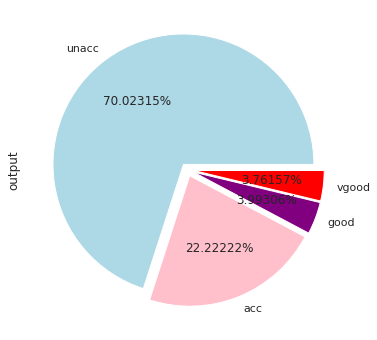

In [10]:
#예제 데이터셋 분포
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'pink', 'purple', 'red'], explode=(0.05, 0.05, 0.05, 0.05))

In [11]:
#원-핫 인코딩 적용
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
y = labels.values

In [12]:
#훈련과 검증 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #random state - 데이터셋을 섞을 때 참조하는 int 값, 튜닝 때 해당 값을 고정해야 데이터셋 변경 방지

In [13]:
#모델 생성 및 컴파일
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 훈련 
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 4ms/step - loss: 0.9343 - acc: 0.6824 - val_loss: 0.8490 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6543 - acc: 0.7213 - val_loss: 0.6992 - val_acc: 0.6534
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.5187 - acc: 0.7611 - val_loss: 0.5726 - val_acc: 0.7365
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4161 - acc: 0.8344 - val_loss: 0.4951 - val_acc: 0.7978
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3546 - acc: 0.8624 - val_loss: 0.4457 - val_acc: 0.8159
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3166 - acc: 0.8824 - val_loss: 0.4060 - val_acc: 0.8412
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2864 - acc: 0.8905 - val_loss: 0.3722 - val_acc: 0.8484
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [15]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0910 - acc: 0.9653
Test Score: 0.09103785455226898
Test Accuracy: 0.9653179049491882
